<a href="https://colab.research.google.com/github/DewliniHerath/Telco_Churn_Predictor/blob/main/notebooks/Telco_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Exploratory Data Analysis**

Step 01: Mount the google drive

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Step 02: Load CSV from Drive

In [64]:
import pandas as pd
file_path = '/content/drive/MyDrive/ML_Coursework/Telco-Customer-Churn.csv'
telco_df = pd.read_csv(file_path)
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Step 03: Analyse the data

In [65]:
# Shape of dataset
print("Dataset shape:", telco_df.shape)
# Column names
print("Column Names\n", telco_df.columns)
# Data types and non-null counts
print(telco_df.info())
# Numerical columns
print("Numerical Data\n", telco_df.describe())
# For all columns including categorical
print("Summary of all columns\n", telco_df.describe(include='all'))

Dataset shape: (7043, 21)
Column Names
 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8

In [66]:
# Finding missing values
print("Missing Values\n", telco_df.isnull().sum())

Missing Values
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64




---
✅ *Positive deduction: there are no missing values across the dataset*

❌*Negative deduction: by observing the data types, "TotalCharges" should be an integer or float but it's an object*




---





Step 04: Convert "TotalCharges" data type to numeric to help in data visualization

In [67]:
# import needed libraries
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

In [68]:
# first check whether there are any blank strings in the column 'TotalCharges"
# before converting to numeric
blank_count = (telco_df['TotalCharges']==' ').sum()
print("Blank strings in TotalCharges:", blank_count)


Blank strings in TotalCharges: 11




---

❗*The **TotalCharges** column contain blank string entries which are non-numeric which will cause conversion errors, thus we replace with NaN the standard placeholder in pandas for missing values.*


---



In [69]:
# firstly replace the blank strings with NaN
telco_df['TotalCharges'] = telco_df['TotalCharges'].str.strip()
telco_df['TotalCharges'] = telco_df['TotalCharges'].replace(' ',np.nan)
# secondly convert to float
telco_df['TotalCharges']= pd.to_numeric(telco_df['TotalCharges'], errors='coerce')
# check the number of NaNs that are available
print("Number of NaNs:", telco_df['TotalCharges'].isna().sum())
# check the type of the column
print("Data type of TotalCharges:",telco_df['TotalCharges'].dtype)

Number of NaNs: 11
Data type of TotalCharges: float64


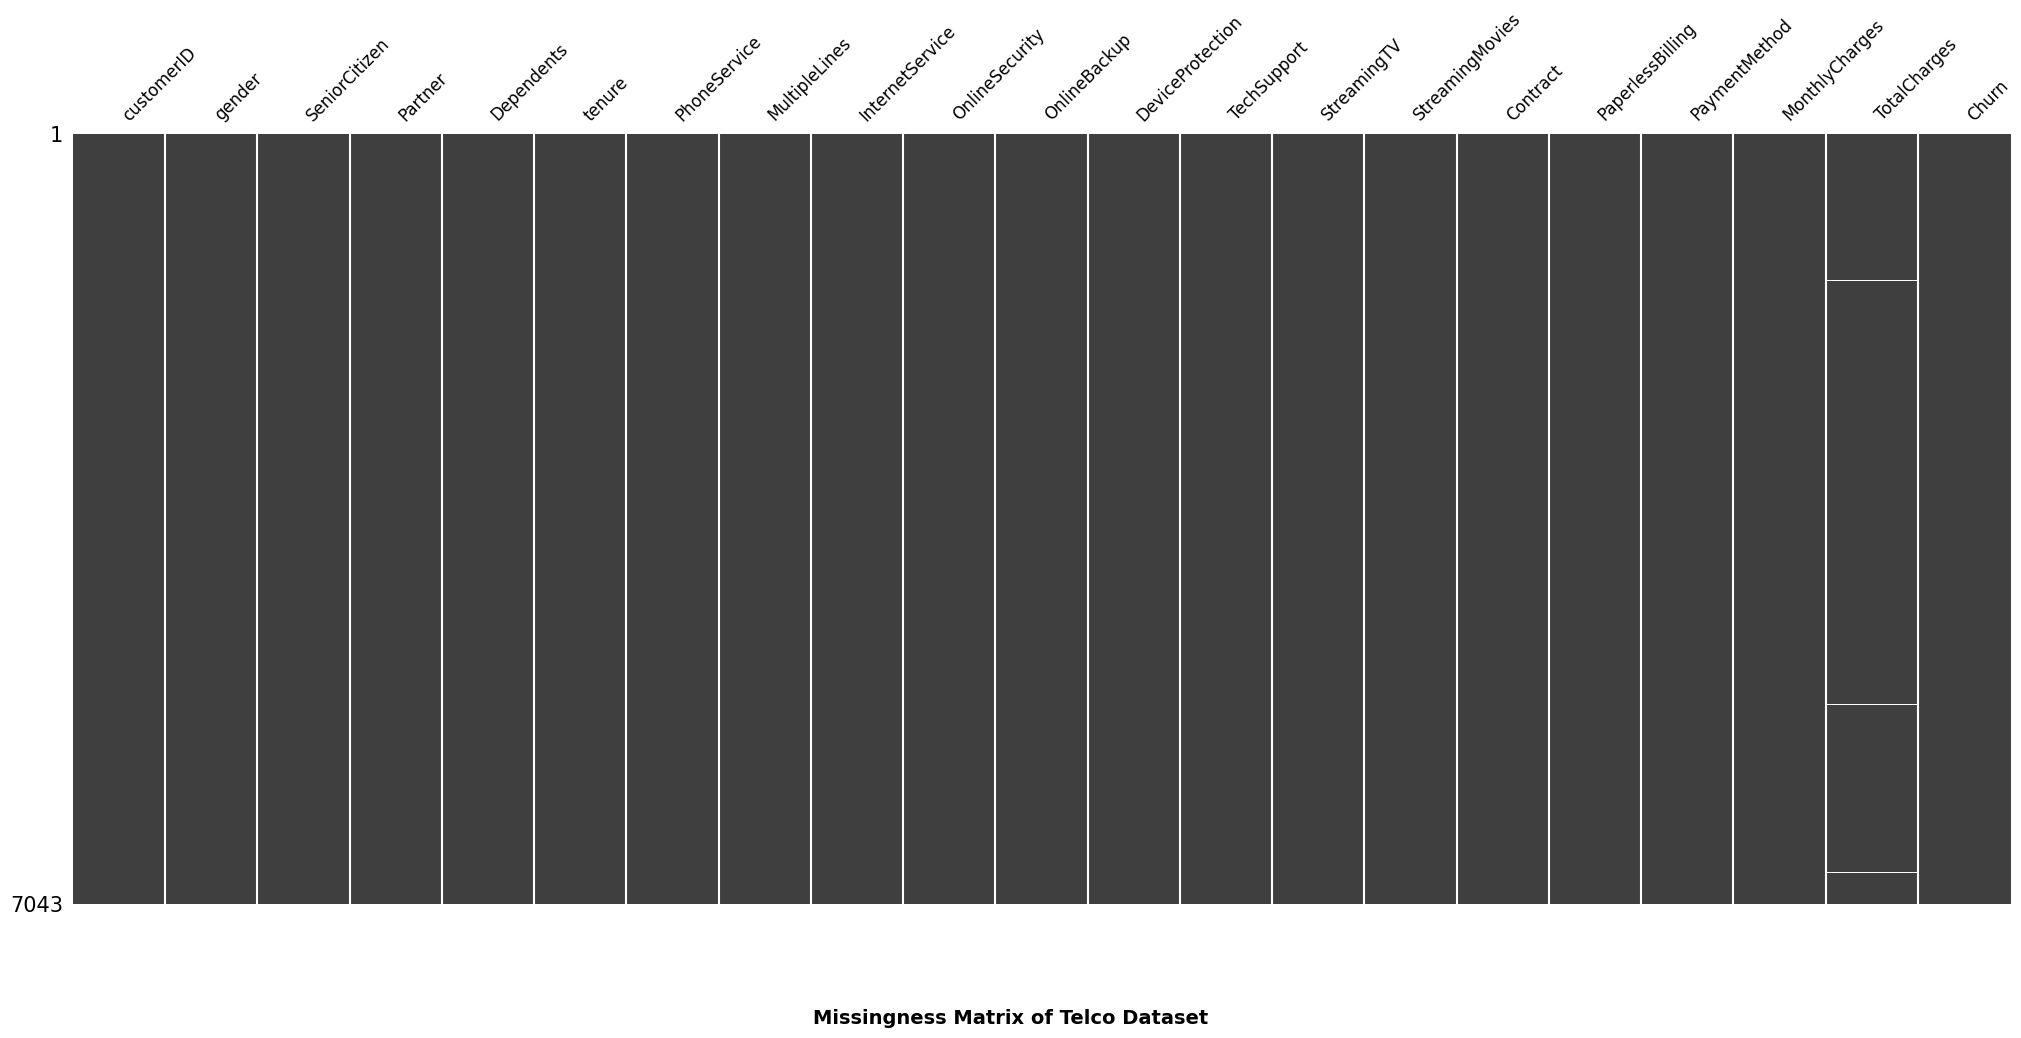

In [70]:
# visualize the NaNs in TotalCharges
msno.matrix(telco_df,fontsize =12, sparkline=False)
plt.figtext(0.5,-0.01,"Missingness Matrix of Telco Dataset",ha='center',fontsize=14,fontweight='bold')
plt.savefig('/content/drive/MyDrive/ML_Coursework/missing_values_matrix.png',bbox_inches='tight')
plt.show()

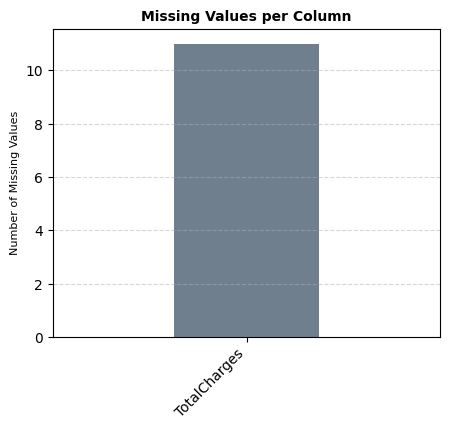

In [71]:
# visualizing missing values across dataset
missing_counts = telco_df.isna().sum()
missing_counts = missing_counts[missing_counts>0]
plt.figure(figsize=(5,4))
missing_counts.plot(kind='bar',color='#34495E', alpha=0.7,width=0.3)
plt.title("Missing Values per Column", fontsize=10,fontweight='bold')
plt.ylabel("Number of Missing Values",fontsize=8)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y',linestyle='--', alpha=0.5)
plt.savefig('/content/drive/MyDrive/ML_Coursework/missing_values_plot.png',bbox_inches='tight')
plt.show()

Step 05: Checking for Duplicate Rows

In [72]:
#count duplicate rows
duplicate_count = telco_df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0




---

✅*Positive Deduction: there are no duplicate rows*


---

